Add your name and student number here

$$\pagebreak$$

### Home assignment - MLP for classification

In the following task you will be applying multi-layer perceptron approach for classification problem. The objective would be to become familiar with shallow (1 hidden layer) and simple deep (2 hidden layers) neural network architectures and their implementation in Theano.

Code snippets from the demo session has already been provided in the cells below. Modify/add your code wherever specified.

**Architecture : **

In the task, you will be exploring architectures with 1 & 2 hidden layers. The input layer will be of 2 dimensions as per the number of training features. Each input dimension is given a weighted connection to every neuron in the first hidden layer. Each of these neurons can be connected further to successive layers in case of multiple hidden layer architectures. Sigmoid activation function with an associated bias term is used for each of these hidden layer neurons.

Finally, a sigmoidal function is used in the output-layer to combine activations from last hidden layer neurons and scale it between 0 to 1.

This exercise deals with two-class classification problem. Since there are two output classes, NN can be designed to have either a single output neuron (output 0 and 1 indicating each of the classes respectively) or with two output neurons (one for each class). In this exercise, consider single output neuron approach as shown in the diagram below.

Use gradient-descent as back-propagation's optimization algorithm and update parameters accordingly. 

The below diagram shows architecture for a network having two hidden layers with 5 & 3 neurons respectively. 

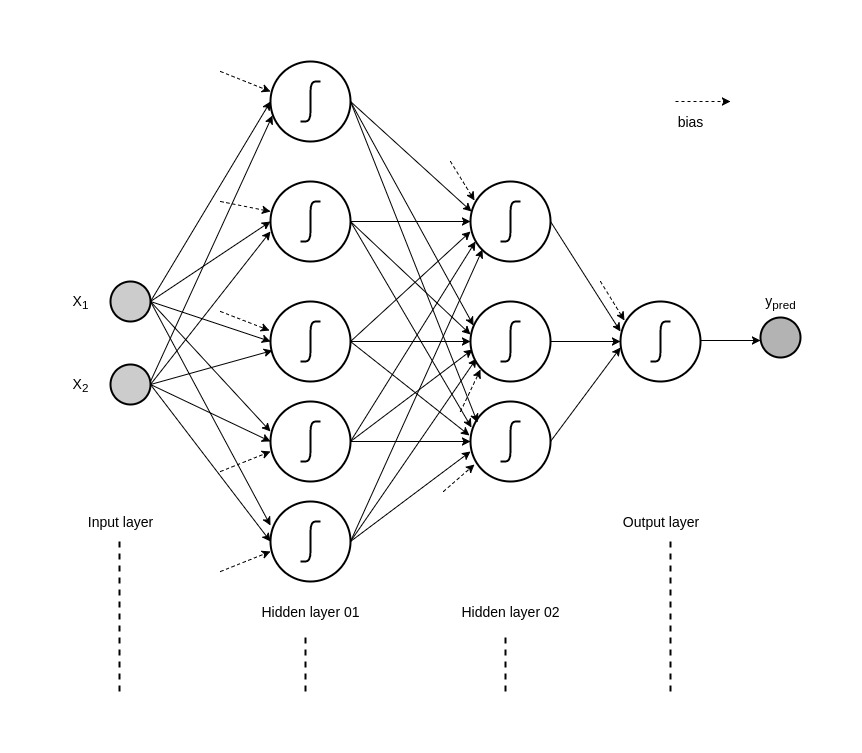

In [6]:
from IPython.display import Image
Image(filename='files/arch2.jpg', height=150, width=600)

**Cost function :**

 Consider cross-entropy cost for the classification
$$
\begin{split}
    \text{cost} &= - \frac{1}{N} \sum_{i = 1} ^N \left(\text{y}_i \cdot \log(\text{ypred}_i)+(1-\text{y}_i) \cdot \log(1- \text{ypred}_i)\right)
\end{split}
$$

There is an in-built implementation theano.tensor.nnet.binary_crossentropy for the above cost function. Please note the order in which predicted and actual values are passed. You can use the same in this exercise. 


http://deeplearning.net/software/theano/library/tensor/nnet/nnet.html#theano.tensor.nnet.nnet.binary_crossentropy

**Tasks :**

**1) Make necessary changes and implement single-hidden layer network for classification**
- modify code to consider 2 dimensional inputs
- change output layer to sigmoid
- implement cross-entropy cost function

Some initial code has been provided as part of 'ClassificationSingleHiddenLayerNN' function


**2) Experiment by running the single hidden layer network with following cases :**
- number of hidden layer neurons = 3, 5 and 8
     
Code for the function calls with above parameter values has already been provided. 
Run the code and make sure that the plots make sense. 
Note that learning rate and number of iterations have been fixed to values 0.2 and 50000 respectively. You might want to reduce the number of iterations for testing purpose, but remember to include results and comments for full 50000 iterations in the final report
         
**3) Extend the implementation for 2-hidden layer network **

A sample architecture has been provided for your reference above and also some initial code has been provided as part of 'ClassificationTwoHiddenLayerNN' function
     
**4) Run experiments for two-hidden layer network with following cases : **
- 3-2 network and 5-3 network and 10-10 network
(m-n denotes m & n neurons in hidden layers 1 & 2 respectively)
         
Code for the functions calls with above parameter values has already been provided. 
Make sure that respective plots are in-place
        
**5) Provide brief comments and discuss on the results obtained in the above experiments (max 200 words)**

In [7]:
from theano import tensor as T
import numpy as np
import theano
import matplotlib.pyplot as plt
import matplotlib as mt
import matplotlib.gridspec as gridspec

% matplotlib inline

**Dataset**

Half-moon dataset is a 2-dimensional toy dataset with two target classes. It has been synthesized from python package scikit-learn. The below section includes the scatter plot of the data. Note the non-linearity of the class separation boundary.

In [8]:
# load train and test datasets
# the following data has been generated using scikit-learn
Xtrain = np.loadtxt("files/halfmoon_Xtrain.txt") 
Ytrain = np.loadtxt("files/halfmoon_Ytrain.txt") 
Xtest = np.loadtxt("files/halfmoon_Xtest.txt") 
Ytest = np.loadtxt("files/halfmoon_Ytest.txt")

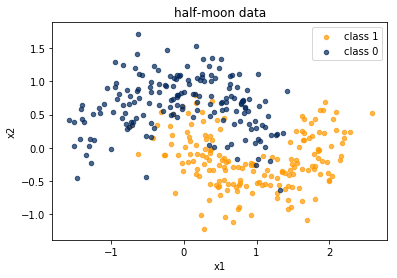

In [9]:
# visualise dataset
plt.scatter(
    Xtrain[Ytrain == 1, 0],
    Xtrain[Ytrain == 1, 1],
    c="#ff9900",
    label="class 1",
    s=20,
    alpha=0.7)

plt.scatter(
    Xtrain[Ytrain == 0, 0],
    Xtrain[Ytrain == 0, 1],
    c="#02275a",
    label="class 0",
    s=20,
    alpha=0.7)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("half-moon data")
plt.show()

**Model visualization**

The following code provides plotting functionality for the classification model. You can just run this cell and move to the first task.

In [10]:
def plotmodelfit(Xtrain,
                 Ytrain,
                 pred_train,
                 nnact,
                 X1grid,
                 X2grid,
                 pred_grid,
                 cost_train_vec,
                 cost_test_vec):
    '''method
    Inputs :
    Xtrain, Ytrain        : N x D, N x 1 : traning datasets
    X1grid, X2grid        : G x G, G x G : grid locations as test dataset
    pred_train, pred_grid : N x 1, G x 1: model predictions on training dataset and grid dataset
    cost_train, cost_test   : num_iter x 1, num_iter x 1 : error across iterations on training and test set
    nnact                 : list of activation values in the hidden layer
    '''

    mt.rcParams['figure.figsize'] = (8, 6)
    norm = mt.colors.Normalize(vmin=0., vmax=1.)

    nh = [f.shape[1] for f in nnact]
    nhiddenl = len(nh)

    fig = plt.figure(num=122)

    # gs for main plot
    gs0 = gridspec.GridSpec(1, 2)
    gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0, 0])

    # gs for hidden layers
    gs1 = gridspec.GridSpecFromSubplotSpec(1, nhiddenl, subplot_spec=gs0[0, 1])

    subgs = []
    for i in np.arange(nhiddenl):
        subgs.append(
            gridspec.GridSpecFromSubplotSpec(nh[i], 1, subplot_spec=gs1[0, i]))

    # ax for main
    ax_00 = fig.add_subplot(gs00[0, 0])  #, adjustable='box-forced'
    ax_00.scatter(
        Xtrain[Ytrain == 1, 0],
        Xtrain[Ytrain == 1, 1],
        c="#ff9900",
        label="class 1",
        s=15,
        alpha=0.8)
    ax_00.scatter(
        Xtrain[Ytrain == 0, 0],
        Xtrain[Ytrain == 0, 1],
        c="#02275a",
        label="class 0",
        s=15,
        alpha=0.8)
    ax_00.contourf(X1grid, X2grid, pred_grid, alpha=0.3)
    ax_00.legend()
    ax_00.set_title("model fit")

    ax_01 = fig.add_subplot(gs00[1, 0])  #, adjustable='box-forced'
    ax_01.plot(
        np.arange(cost_train_vec.shape[0]),
        cost_train_vec,
        c="#27ae61",
        label="train")
    ax_01.plot(
        np.arange(cost_test_vec.shape[0]),
        cost_test_vec,
        c="#c1392b",
        label="test")
    ax_01.set_xlabel("iterations")
    ax_01.set_ylabel("cost function")
    ax_01.set_title("cost function across iterations")
    ax_01.legend()

    axhl = []

    # nested list for hidden layer activations
    for hlayer in np.arange(nhiddenl):
        axnn = []
        for hnn in np.arange(nh[hlayer]):
            ax = fig.add_subplot(subgs[hlayer][hnn, 0], aspect='equal')
            ax.scatter(
                Xtrain[:, 0],
                Xtrain[:, 1],
                c=nnact[hlayer][:, hnn],
                cmap="RdBu",
                s=5,
                norm=norm)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            if hnn == 0:
                ax.set_title("activations " + "\n" + "in layer " +
                             str(hlayer + 1))
            axnn.append(ax)
        axhl.append(axnn)

    fig.tight_layout()

**Task 01. Implementation with single hidden layer **

ADD YOUR CODE IN PLACE OF **#-------------#**

In [26]:
def ClassificationSingleHiddenLayerNN(Xtrain,
                                     Ytrain,
                                     Xtest,
                                     Ytest,
                                     nn1=4,
                                     training_steps=50000,
                                     alpha=0.2):
    '''
    Input:
    Xtrain   : N x D    : traning set features
    Ytrian   : N x 1    : training set target
    Xtest    : M x D    : test set feaures
    Ytest    : M x 1    : test set target
    nn1      : scalar   : no. of neurons to be used in first hidden layer
    training_steps : scalar : no. of training iteration steps
    alpha    : scalar   : learning rate
    '''
    print("*** running ***")
    # define input and output variables in theano
    x = T.matrix('x')
    y = T.vector('y')
    xdim = Xtrain.shape[1] # number of features in the data
    
    
    
    ##########################################################
    ################### add your code here ###################
    ##########################################################
    
    # HINT : FOR WEIGHTS USE RANDOM STANDRD GAUSSIAN INITIALIZATION
    #      : FOR BIAS USE ZERO INITIALIZATION
    
    # paramters declaration & initialization
    # weights from input-neurons in the hidden layer 
    np.random.seed(1232)
    w_1 = theano.shared(np.random.randn(2, nn1), name='w_1') 

    # bias to neurons in the hidden layer
    b_1 = theano.shared(np.zeros((nn1,)), name='b_1')  

    # weights for hidden - output layer connection
                     
    np.random.seed(1232)
    w_out = theano.shared(
    np.random.randn(nn1,), name='w_out')  
 
    # bias to output layer declaration & initialization
    b_out =theano.shared(0.,name='b_out')

    # hidden layer output activations
    h_out = theano.tensor.nnet.sigmoid(T.dot(x, w_1) + b_1)  

    # perceptron predictions
    y_pred = theano.tensor.nnet.sigmoid(T.dot(h_out,w_out)+b_out)

    # cross-entropy as cost function
    cost   = T.mean(theano.tensor.nnet.binary_crossentropy(y_pred,y))

    # gradient computation
    gw_1, gb_1, gw_out, gb_out = T.grad(cost,[w_1,b_1,w_out,b_out])
    
    
    # train_model theano function
    # Note : outputs should return following in order
    #      : [prediction vector, error/cost scalar, hidden layer activation vector]
                         
    updates  =  [(w_1, w_1 - alpha * gw_1), 
             (b_1, b_1 - alpha * gb_1),
             (w_out, w_out - alpha * gw_out), 
             (b_out, b_out - alpha * gb_out)] 
    train_model = theano.function(
             inputs  = [x, y],
             outputs = [y_pred, cost, h_out],
             updates = updates
            )

    # function 
    # compute prediction on unseen test data
    # Input   : x, y are intput, target vectors respectively
    # Output  :  list of predictions
    predict_model = theano.function(inputs=[x], outputs=[y_pred])
    
    # function 
    # compute cost on test data
    # Input   : x, y are intput, target vectors respectively
    # Output  : scalar cost
    cost_function = theano.function(inputs=[x,y], outputs=cost)
    
   
    ##########################################################
    ###################        end         ###################
    ##########################################################
    
    # accumulate error over iterations on traning and test set in a vector
    cost_train_vec = np.array([])
    cost_test_vec = np.array([])

    for i in np.arange(training_steps):
        # get predictions, cost, activation values 
        # on the training set
        # pred_train - vector - predictions on training data
        # cost_train  - scalar - cost/error for the current parameter value
        # nactivation- vector - activation function from the hidden layer
        pred_train, cost_train, nactivation = train_model(
            Xtrain, Ytrain)
        cost_train_vec = np.append(cost_train_vec, cost_train)
          
        # get predictions, cost on test set
        pred_test = predict_model(Xtest)
        cost_test = cost_function(Xtest,Ytest)
        cost_test_vec = np.append(cost_test_vec, cost_test)
        
        # printing
        if i % 10000 == 0:
            print("Iteration %6s -- "%i,'Training cost: ',"%4.4f"%cost_train)
    
    print("final train set cost : %.4f"%cost_train)
    print("final test set cost  : %.4f"%cost_test)
    
    # compute classification accuracies
    train_predictions = (np.round(predict_model(Xtrain)).reshape((1,-1)))
    train_accuracy = np.mean(train_predictions == Ytrain)
    print("final train set classification accuracy : %.4f"%train_accuracy)
    
    test_predictions = np.round(pred_test).reshape((1,-1))
    test_accuracy = np.mean(test_predictions == Ytest)
    print("final test set classification accuracy : %.4f"%test_accuracy)
    
    # for the final model, plot model fit and activations
    # on a grid
    X1grid, X2grid = np.meshgrid(
        np.linspace(-2, 3, 100), np.linspace(-1.7, 2, 100))
    pred_grid = predict_model(
        np.transpose(np.array([X1grid.flatten(), X2grid.flatten()])))
    pred_grid = np.array(pred_grid)
    pred_grid = pred_grid.reshape(X1grid.shape)

    plotmodelfit(Xtrain, Ytrain, pred_train,
                 [nactivation],
                 X1grid, X2grid,pred_grid,
                 cost_train_vec, cost_test_vec)
    
    

**Task 02. Run experiments**

**Single hidden layer ~ 3 neurons**

*** running ***
Iteration      0 --  Training cost:  1.0156
Iteration  10000 --  Training cost:  0.3171
Iteration  20000 --  Training cost:  0.3158
Iteration  30000 --  Training cost:  0.3133
Iteration  40000 --  Training cost:  0.1785
final train set cost : 0.1721
final test set cost  : 0.2099
final train set classification accuracy : 0.9314
final test set classification accuracy : 0.9067


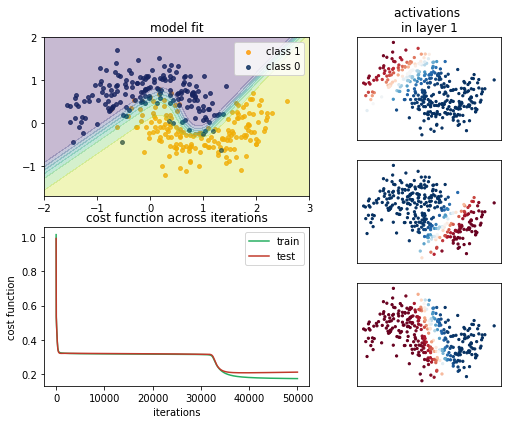

In [27]:
ClassificationSingleHiddenLayerNN(
    Xtrain, Ytrain, Xtest, Ytest, nn1=3, training_steps=50000)

**Single hidden layer ~ 5 neurons**

*** running ***
Iteration      0 --  Training cost:  1.1220
Iteration  10000 --  Training cost:  0.2975
Iteration  20000 --  Training cost:  0.1831
Iteration  30000 --  Training cost:  0.1715
Iteration  40000 --  Training cost:  0.1683
final train set cost : 0.1666
final test set cost  : 0.2147
final train set classification accuracy : 0.9343
final test set classification accuracy : 0.9133


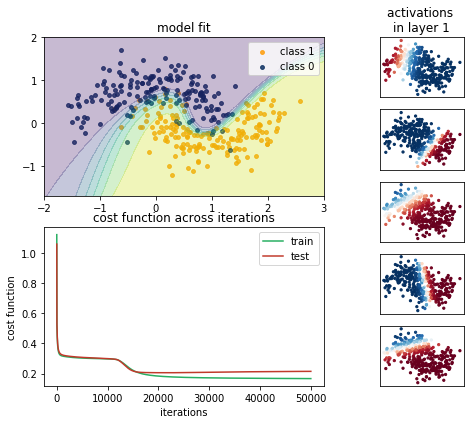

In [28]:
ClassificationSingleHiddenLayerNN(
    Xtrain, Ytrain, Xtest, Ytest, nn1=5, training_steps=50000)

**Single hidden layer ~ 8 neurons**

*** running ***
Iteration      0 --  Training cost:  1.4135
Iteration  10000 --  Training cost:  0.2138
Iteration  20000 --  Training cost:  0.1831
Iteration  30000 --  Training cost:  0.1668
Iteration  40000 --  Training cost:  0.1585
final train set cost : 0.1547
final test set cost  : 0.2126
final train set classification accuracy : 0.9314
final test set classification accuracy : 0.9067


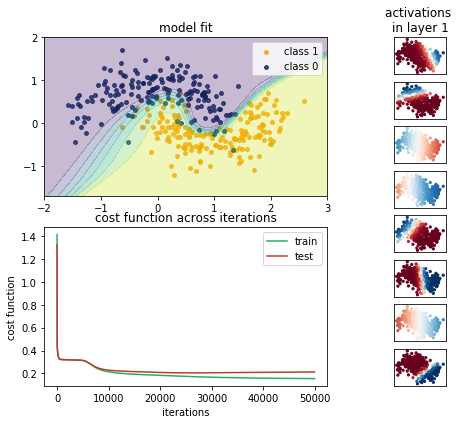

In [29]:
ClassificationSingleHiddenLayerNN(
    Xtrain, Ytrain, Xtest, Ytest, nn1=8, training_steps=50000)

 **Task 03. Implementation with two hidden layers**

In [34]:
def ClassificationTwoHiddenLayerNN(Xtrain,
                                  Ytrain,
                                  Xtest,
                                  Ytest,
                                  nn1=4,
                                  nn2=3,
                                  training_steps=50000,
                                  alpha=0.2):
    '''
    Input:
    Xtrain   : N x D    : traning set features
    Ytrian   : N x 1    : training set target
    Xtest    : M x D    : test set feaures
    Ytest    : M x 1    : test set target
    nn1      : scalar   : no. of neurons to be used in first hidden layer
    nn2      : scalar   : no. of neurons to be used in second hidden layer
    training_steps : scalar : no. of training iteration steps
    alpha    : scalar   : learning rate
    
    
    '''
    print("*** running ***")
 
    # define input and output variables in theano
    x = T.matrix('x')
    y = T.vector('y')
    xdim = Xtrain.shape[1]  # number of features in the data
    
    
    
    ##########################################################
    ################### add your code here ###################
    ##########################################################
            
    # HINT : FOR WEIGHTS USE RANDOM STANDRD GAUSSIAN INITIALIZATION
    #      : FOR BIAS USE ZERO INITIALIZATION
    
    # layer 01 parameter declaration & initialization (weights/bias)
    np.random.seed(1232)
    w_1 = theano.shared(np.random.randn(xdim, nn1), name='w_1') 
    b_1 = theano.shared(np.zeros((nn1,)),name='b_1')

    # layer 02 parameter declaration & initialization (weights/bias) 
    np.random.seed(1232)
    w_2 = theano.shared(np.random.randn(nn1, nn2), name='w_2') 
    b_2 = theano.shared(np.zeros((nn2,)),name='b_2')

    # output layer parameter declaration & initialization (weights/bias) 
    np.random.seed(1232)
    w_out = theano.shared(np.random.randn(nn2,), name='w_out') 
    b_out = theano.shared(0.,name='b_out')

    # hidden layer output
    h_out_1 = theano.tensor.nnet.sigmoid(T.dot(x, w_1) + b_1)  
    h_out_2 = theano.tensor.nnet.sigmoid(T.dot(h_out_1, w_2) + b_2)  

    # perceptron predictions
    y_pred = theano.tensor.nnet.sigmoid(T.dot(h_out_2, w_out) + b_out) 

    # cross-entropy as cost function
    cost   = T.mean(theano.tensor.nnet.binary_crossentropy(y_pred,y))

    # gradient computation
    gw_1, gb_1, gw_2, gb_2, gw_out, gb_out = T.grad(cost,[w_1,b_1,w_2,b_2,w_out,b_out])
        
    # train_model theano function
    # Note : outputs should return following in order
    #      : [prediction vector, error/cost scalar,
    #        1st hidden layer activation vector, 2nd hidden layer activation vector]
    train_model = theano.function(
             inputs  = [x,y],
             outputs = [y_pred, cost, h_out_1, h_out_2],
             updates = [(w_1, w_1 - alpha * gw_1), 
             (b_1, b_1 - alpha * gb_1),
             (w_2, w_2 - alpha * gw_2), 
             (b_2, b_2 - alpha * gb_2),
             (w_out, w_out - alpha * gw_out), 
             (b_out, b_out - alpha * gb_out)] 
            )
    

    # function 
    # compute prediction on unseen test data
    # Input   : x, y are intput, target vectors respectively
    # Output  :  list of predictions
    predict_model = theano.function(inputs=[x], outputs=[y_pred])
    
    # function 
    # compute cost on test data
    # Input   : x, y are intput, target vectors respectively
    # Output  : scalar cost
    cost_function = theano.function(inputs=[x,y], outputs=cost)
    

    ##########################################################
    ###################        end         ###################
    ##########################################################
        
        
        
    # accumulate error over iterations on traning and test set in a vector
    cost_train_vec = np.array([])
    cost_test_vec = np.array([])

    # training iterations begin
    for i in np.arange(training_steps):
        
        # get predictions, cost, activation values 
        # on the training set
        # pred_train - vector - predictions on training data
        # cost_train  - scalar - cost/error for the current parameter value
        # nactivation- vector - activation function from the hidden layer
        pred_train, cost_train, nactivation1, nactivation2 = train_model(
            Xtrain, Ytrain)
        cost_train_vec = np.append(cost_train_vec, cost_train)
            
        # get predictions, cost on test set
        pred_test = predict_model(Xtest)
        cost_test = cost_function(Xtest,Ytest)
        cost_test_vec = np.append(cost_test_vec, cost_test)
        
        # printing
        if i % 10000 == 0:
            print("Iteration %6s -- "%i,'Training cost: ',"%4.4f"%cost_train)

    print("final train set cost : %.4f"%cost_train)
    print("final test set cost  : %.4f"%cost_test)
    
    # compute classification accuracies
    train_predictions = (np.round(predict_model(Xtrain)).reshape((1,-1)))
    train_accuracy = np.mean(train_predictions == Ytrain)
    print("final train set classification accuracy : %.4f"%train_accuracy)
    
    test_predictions = np.round(pred_test).reshape((1,-1))
    test_accuracy = np.mean(test_predictions == Ytest)
    print("final test set classification accuracy : %.4f"%test_accuracy)
    
    # for the final model, plot model fit and activations
    # on a grid
    X1grid, X2grid = np.meshgrid(
        np.linspace(-2, 3, 100), np.linspace(-1.7, 2, 100))
    pred_grid = predict_model(
        np.transpose(np.array([X1grid.flatten(), X2grid.flatten()])))
    pred_grid = np.array(pred_grid)
    pred_grid = pred_grid.reshape(X1grid.shape)

    plotmodelfit(Xtrain, Ytrain, pred_train,
                 [nactivation1, nactivation2],
                 X1grid, X2grid, pred_grid,
                 cost_train_vec, cost_test_vec)

**Task 04. Run experiments**

**Two hidden layers ~ 3 and 2 neurons**

*** running ***
Iteration      0 --  Training cost:  1.3148
Iteration  10000 --  Training cost:  0.3179
Iteration  20000 --  Training cost:  0.3152
Iteration  30000 --  Training cost:  0.3124
Iteration  40000 --  Training cost:  0.1692
final train set cost : 0.1661
final test set cost  : 0.2164
final train set classification accuracy : 0.9286
final test set classification accuracy : 0.9000


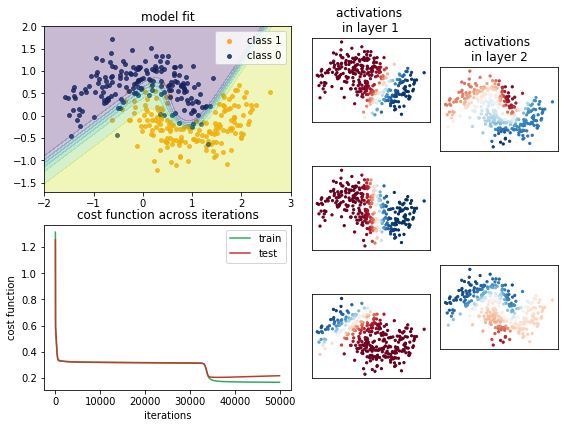

In [35]:
ClassificationTwoHiddenLayerNN(
    Xtrain, Ytrain, Xtest, Ytest, nn1=3, nn2=2, training_steps=50000)

**Two hidden layers ~ 5 and 3 neurons**

*** running ***
Iteration      0 --  Training cost:  1.5847
Iteration  10000 --  Training cost:  0.1847
Iteration  20000 --  Training cost:  0.1514
Iteration  30000 --  Training cost:  0.1452
Iteration  40000 --  Training cost:  0.1429
final train set cost : 0.1416
final test set cost  : 0.2622
final train set classification accuracy : 0.9314
final test set classification accuracy : 0.9067


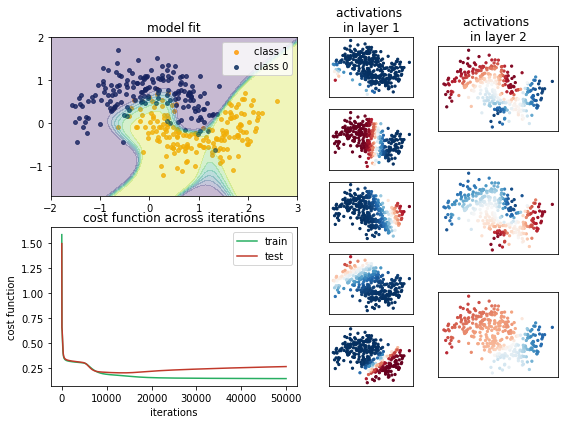

In [36]:
ClassificationTwoHiddenLayerNN(
    Xtrain, Ytrain, Xtest, Ytest, nn1=5, nn2=3, training_steps=50000)

**Two hidden layers ~ 10 and 10 neurons**

*** running ***
Iteration      0 --  Training cost:  3.0409
Iteration  10000 --  Training cost:  0.1685
Iteration  20000 --  Training cost:  0.1544
Iteration  30000 --  Training cost:  0.1446
Iteration  40000 --  Training cost:  0.1400
final train set cost : 0.1368
final test set cost  : 0.2616
final train set classification accuracy : 0.9371
final test set classification accuracy : 0.9067


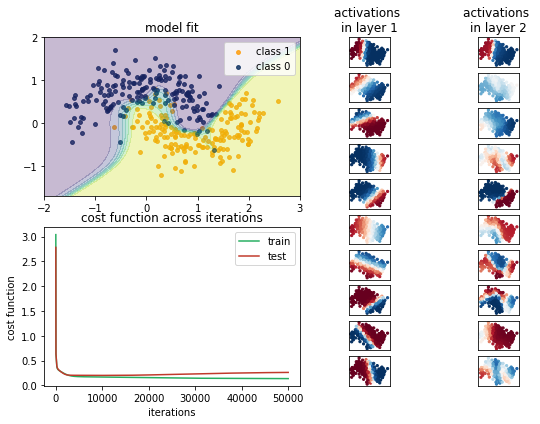

In [37]:
ClassificationTwoHiddenLayerNN(
    Xtrain, Ytrain, Xtest, Ytest, nn1=10, nn2=10, training_steps=50000)

**Task 05. Discussion**